In [266]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import plotly
import cufflinks as cf

In [267]:
df = pd.read_csv('data/StateGenderYr.csv')

In [268]:
df.head()

,Notes,Year,Year Code,Race,Race Code,State,State Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,NaN,1999,1999,American Indian or Alaska Native,1002-5,Alabama,1,Female,F,24,11411,210.32
1,NaN,1999,1999,American Indian or Alaska Native,1002-5,Alaska,2,Female,F,293,52608,556.95
2,NaN,1999,1999,American Indian or Alaska Native,1002-5,Arizona,4,Female,F,704,140372,501.52
3,NaN,1999,1999,American Indian or Alaska Native,1002-5,Arkansas,5,Female,F,19,9138,207.922959072007
4,NaN,1999,1999,American Indian or Alaska Native,1002-5,California,6,Female,F,411,225050,182.63


In [269]:
df.isnull().sum()

Notes          4284
Year              0
Year Code         0
Race              0
Race Code         0
State             0
State Code        0
Gender            0
Gender Code       0
Deaths            0
Population        0
Crude Rate        0
dtype: int64

In [270]:
df.drop(columns=['Notes'], inplace=True)

In [271]:
df.Deaths.value_counts()

Suppressed    284
27             39
10             38
17             30
12             30
             ... 
1215            1
7381            1
2117            1
1224            1
10133           1
Name: Deaths, Length: 2265, dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         4284 non-null   int64 
 1   Year Code    4284 non-null   int64 
 2   Race         4284 non-null   object
 3   Race Code    4284 non-null   object
 4   State        4284 non-null   object
 5   State Code   4284 non-null   int64 
 6   Gender       4284 non-null   object
 7   Gender Code  4284 non-null   object
 8   Deaths       4284 non-null   object
 9   Population   4284 non-null   int64 
 10  Crude Rate   4284 non-null   object
dtypes: int64(4), object(7)
memory usage: 368.3+ KB


In [273]:
df.drop(columns=['Year Code', 'Race Code', 'State Code', 'Gender Code'], inplace=True)

In [274]:
df.Population.sum()

3261775883

In [275]:
suppressed = df.loc[df['Deaths'] == 'Suppressed']
suppressed.info()
suppressed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 6 to 4208
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        284 non-null    int64 
 1   Race        284 non-null    object
 2   State       284 non-null    object
 3   Gender      284 non-null    object
 4   Deaths      284 non-null    object
 5   Population  284 non-null    int64 
 6   Crude Rate  284 non-null    object
dtypes: int64(2), object(5)
memory usage: 17.8+ KB


,Year,Race,State,Gender,Deaths,Population,Crude Rate
6,1999,American Indian or Alaska Native,Connecticut,Female,Suppressed,5751,Suppressed
7,1999,American Indian or Alaska Native,Delaware,Female,Suppressed,1587,Suppressed
8,1999,American Indian or Alaska Native,District of Columbia,Female,Suppressed,1128,Suppressed
17,1999,American Indian or Alaska Native,Kentucky,Female,Suppressed,3292,Suppressed
29,1999,American Indian or Alaska Native,New Hampshire,Female,Suppressed,1553,Suppressed
...,...,...,...,...,...,...,...
4091,2019,American Indian or Alaska Native,Hawaii,Female,Suppressed,3052,Suppressed
4109,2019,American Indian or Alaska Native,New Hampshire,Female,Suppressed,2483,Suppressed
4125,2019,American Indian or Alaska Native,Vermont,Female,Suppressed,1573,Suppressed
4128,2019,American Indian or Alaska Native,West Virginia,Female,Suppressed,2223,Suppressed


In [276]:
df1 = df.groupby(['Year', "Race"]).sum()


#### Total Population for each Race

In [282]:
df1

Population
Year Race                                        
1999 American Indian or Alaska Native     1421980
     Asian or Pacific Islander            5845369
     Black or African American           18978030
     White                              115991916
2000 American Indian or Alaska Native     1496044
...                                           ...
2018 White                              128385028
2019 American Indian or Alaska Native     2387147
     Asian or Pacific Islander           11350332
     Black or African American           24220575
     White                              128624145

[84 rows x 1 columns]

In [278]:
check = df1.groupby(['Year'])['Population'].sum()
check

Year
1999    142237295
2000    143368343
2001    145077463
2002    146394634
2003    147679036
2004    148977286
2005    150319521
2006    151732647
2007    153166353
2008    154604015
2009    155964075
2010    156964212
2011    158301098
2012    159421973
2013    160477237
2014    161920569
2015    163189523
2016    164048590
2017    165311059
2018    166038755
2019    166582199
Name: Population, dtype: int64

In [265]:
df1

Population  Total Pop
Year Race                                                   
1999 American Indian or Alaska Native     1421980    1421980
     Asian or Pacific Islander            5845369    5845369
     Black or African American           18978030   18978030
     White                              115991916  115991916
2000 American Indian or Alaska Native     1496044    1496044
...                                           ...        ...
2018 White                              128385028  128385028
2019 American Indian or Alaska Native     2387147    2387147
     Asian or Pacific Islander           11350332   11350332
     Black or African American           24220575   24220575
     White                              128624145  128624145

[84 rows x 2 columns]

In [217]:
suppressed.Race.value_counts()

American Indian or Alaska Native    133
Black or African American            79
Asian or Pacific Islander            72
Name: Race, dtype: int64

In [220]:
df.Race.value_counts().sum()

4284

In [225]:
df['Crude Rate'].replace(to_replace = {'Suppressed': np.nan}, inplace=True)

In [234]:
df['Crude Rate'] = df['Crude Rate'].astype(float)

In [237]:
df['Crude Rate'].argmin(), df['Crude Rate'].argmax()

(3702, 150)

In [246]:
df.iloc[150]

Year                                1999
Year Code                           1999
Race           Black or African American
Race Code                         2054-5
State                      West Virginia
State Code                            54
Gender                            Female
Gender Code                            F
Deaths                               383
Population                         29770
Crude Rate                       1286.53
Name: 150, dtype: object

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         4284 non-null   int64  
 1   Year Code    4284 non-null   int64  
 2   Race         4284 non-null   object 
 3   Race Code    4284 non-null   object 
 4   State        4284 non-null   object 
 5   State Code   4284 non-null   int64  
 6   Gender       4284 non-null   object 
 7   Gender Code  4284 non-null   object 
 8   Deaths       4284 non-null   object 
 9   Population   4284 non-null   int64  
 10  Crude Rate   4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 368.3+ KB


In [107]:
df2 = df.drop(columns=['Year Code', 'Race Code', 'State Code', 'Gender'])

In [164]:
df3 = df[df.Deaths != 'Suppressed']


In [165]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 4283
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         4000 non-null   int64  
 1   Year Code    4000 non-null   int64  
 2   Race         4000 non-null   object 
 3   Race Code    4000 non-null   object 
 4   State        4000 non-null   object 
 5   State Code   4000 non-null   int64  
 6   Gender       4000 non-null   object 
 7   Gender Code  4000 non-null   object 
 8   Deaths       4000 non-null   object 
 9   Population   4000 non-null   int64  
 10  Crude Rate   4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 375.0+ KB


In [153]:
df3.drop(['Year Code'], axis=1, inplace=True)

In [166]:
yr_df = df3.groupby('Year')

In [167]:
df3['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [168]:
df3.Year = df3.Year.astype(int)


In [169]:
# df["Crude Rate"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages", xTitle='Ages', yTitle='Count')


In [170]:
yr = df3.groupby(['Year Code'])['Crude Rate'].mean()

In [171]:
pal = sns.color_palette("Blues")
print(pal.as_hex())

['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']


Text(0, 0.5, 'Crude Rate (deaths per 100,000)')

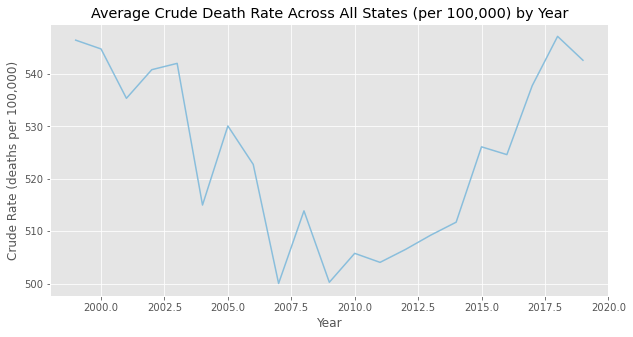

In [180]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = yr, ax=ax, color='#89bedc')
plt.title('Average Crude Death Rate Across All States (per 100,000) by Year')
plt.xlabel('Year')
plt.ylabel('Crude Rate (deaths per 100,000)')

In [176]:
yr.head()

Year Code
1999    546.464740
2000    544.781348
2001    535.360938
2002    540.825654
2003    542.032087
Name: Crude Rate, dtype: float64

In [201]:
df3['Year'] = pd.to_datetime(df3['Year'], format='%Y', unit='Y')

In [202]:
df3.Race.unique()

array(['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White'], dtype=object)

<AxesSubplot:xlabel='Race,Year'>

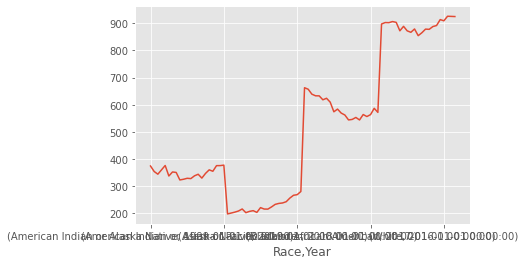

In [185]:
race = ['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White']
df_me = df3.loc[df3['Race'].isin(race)]
df_me

df_me.groupby(['Race', 'Year'])['Crude Rate'].mean().plot()

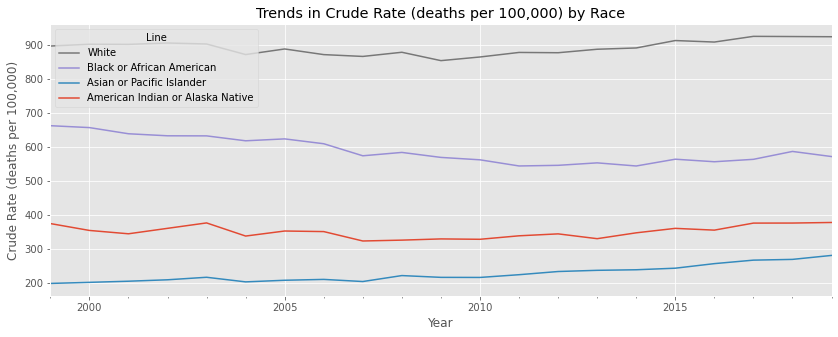

In [195]:
fig, ax = plt.subplots(figsize=(14, 5))
df_me.groupby(['Year', 'Race'])['Crude Rate'].mean().unstack().plot(ax=ax)  
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
ax.set_title('Trends in Crude Rate (deaths per 100,000) by Race')
ax.set_ylabel('Crude Rate (deaths per 100,000)');

In [203]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 4283
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         4000 non-null   datetime64[ns]
 1   Year Code    4000 non-null   int64         
 2   Race         4000 non-null   object        
 3   Race Code    4000 non-null   object        
 4   State        4000 non-null   object        
 5   State Code   4000 non-null   int64         
 6   Gender       4000 non-null   object        
 7   Gender Code  4000 non-null   object        
 8   Deaths       4000 non-null   object        
 9   Population   4000 non-null   int64         
 10  Crude Rate   4000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 375.0+ KB


In [206]:
df3.drop(columns=['Year Code', 'Race Code', 'State Code', 'Gender'], inplace=True)

In [208]:
df3.head(50)

,Year,Race,State,Gender Code,Deaths,Population,Crude Rate
0,1999-01-01,American Indian or Alaska Native,Alabama,F,24,11411,210.320000
1,1999-01-01,American Indian or Alaska Native,Alaska,F,293,52608,556.950000
2,1999-01-01,American Indian or Alaska Native,Arizona,F,704,140372,501.520000
3,1999-01-01,American Indian or Alaska Native,Arkansas,F,19,9138,207.922959
4,1999-01-01,American Indian or Alaska Native,California,F,411,225050,182.630000
5,1999-01-01,American Indian or Alaska Native,Colorado,F,56,26101,214.550000
9,1999-01-01,American Indian or Alaska Native,Florida,F,59,29353,201.000000
10,1999-01-01,American Indian or Alaska Native,Georgia,F,37,10010,369.630000
11,1999-01-01,American Indian or Alaska Native,Hawaii,F,10,2183,458.085204
12,1999-01-01,American Indian or Alaska Native,Idaho,F,38,9750,389.740000
